<a href="https://colab.research.google.com/github/musicjae/Dive-into-the-deeplearning/blob/master/Tensorflow(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 딥러닝 시작하기  
  
  **1.1 인공 신경망은 어떻게 학습하는가? **

  신경망의 학습 과정은 가중치 최적화의 반복적인 과정으로 형성되고, 그러한 이유 탓에 지도 학습 유형에 포함된다. 이 가중치는 트레이닝 셋에 속한 예들의 집합에 대한 신경망의 수행능력을 기반으로 수정된다. 그 목적은 손실 함수를 최소화하게 만드는 것이다. 신경망의 수행능력은 (트레이닝 셋이 아니라) 대상을 구성하는 테스트 셋(가령 이미지 분류기 문제 내의 이미지)으로 증명된다.  
  

  **1.2 역전파 알고리즘**  
  
  사용된 지도 학습 알고리즘은 역전파 알고리즘이다. 이것은 다음과 같다:  
  - 랜덤 가중치로 신경망을 초기화
  - 모든 트레이닝 경우에 대해, 순전파 계산, 역전파 계산
  - 오차 함수를 구해라.
  - 오차 함수를 최소화하기 위해 현재 레이어에서 가중치를 채택하라. 이것은 역전파의 최적화 과정이다. 이 트레이닝 과정은 검증 집합의 오차가 증가하기 시작할 때 끝난다. 왜냐하면 이것은 신경망의 과적합 국면이 시작한다는 것을 나타내기 때문이다. 


  **1.3 가중치 초기화**  
    
가중치 초기화에 대한 효율적인 알고리즘을 이용하려면, 신경망의 구성에서 필수적인 도구를 사용해야 한다. 경사 하강법이라 불리는 반복적인 수치 분석을 가지고 이것을 사용해보자. 그 과정은 다음과 같다:  
- 모델의 파라미터에 대한 일부 초깃값을 임의적으로 선택해라
- 모델의 각 패러미터에 대한 오차 함수의 그래디언트 G를 계산하라.
- 모델의 패러미터가 감소하는 방향으로 그것을 바꿔줘라.
-위 과정을 G가 0에 근접할 때까지 반복하라.  
(어떤 초기화 방법을 사용하느냐에 따라 얼마나 G가 0에 더 가까워질 수 있는가가 달라진다. 이것에 대한 탐구는 나중에.)  
  

  **1.4 확률적 경사 하강법**  
    
데이터셋이 매우 클 때, GD를 이용하는 것은 큰 비용을 요구한다. 분명히, 단 한번의 pass로 이 큰 데이터셋을 모두 사용하는 것은 부담스럽다. 뿐만 아니라, 이것은 알고리즘이 가중치를 업데이트하는 것을 더 느리게 만든다.  
우리는 이 곤경을 해소하기 위해, 확률적 경사 하강법SGD를 사용한다. 여기서 우리는 특정 iter의 패러미터를 업데이트하기 위해 오직 트레이닝셋의 샘플(트레이닝 셋의 일부)만을 사용한다. 용어 '확률적stochastic'은 <단일 트레이닝 샘플에 기반한 그래디언트가 참인 비용 그래디언트의 확률적 근사라는 사실>에서 유래되었다.
  
    
      


# 2. 텐서플로우의 첫 걸음    
  

**2.1 계산 그래프 Computational Graphs ** 
  
  신경 훈련 같은 연산을 수행할 때, 텐서플로우는 내부적으로 data flow graphs( computational graphs)를 사용하여 표현한다. 이것은 방향 그래프로 표현된다. 방향 그래프란 다음 같이 구성된다:  
  - 각각이 연산을 표현하는 노드들의 집합
  - 연산이 수행되는 데이터를 표현하는 방향이 있는 arc의 집합  
    
**2.2 왜 computational Graphs인가?  **

계산 그래프의 단계를 만드는 동안, 세션 단계의 실행을 통해 그 그래프를 평가하고자 할 때 우리는 매우 복잡한 표현을 구성할 수 있다.  
  
  **2.3 프로그래밍 모델**  
    
텐서플로우 프로그램은 보통 다음 같이 3 가지 단계로 구분된다:  
  
- 계산 그래프 구성하기
- 그래프에서 정의된 연산을 수행하는 세션을 실행하기
- 자료를 collect, 분석
  


In [1]:
# 라이브러리 임포트
from __future__ import absolute_import, division, print_function, unicode_literals

!pip install -q tensorflow-gpu==2.0.0-rc1
import tensorflow as tf

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

     |████████████████████████████████| 380.5MB 45kB/s 
     |████████████████████████████████| 4.3MB 39.1MB/s 
     |████████████████████████████████| 501kB 41.1MB/s 


In [25]:
# 데이터셋 로드

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# 채널 차원을 추가합니다.
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]


In [26]:
# 배치 만들기
train_ds = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train)).shuffle(10000).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

In [27]:
# 모델 만들기  
class MyModel(Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.conv1 = Conv2D(32, 3, activation='relu')
    self.flatten = Flatten()
    self.d1 = Dense(128, activation='relu')
    self.d2 = Dense(10, activation='softmax')

  def call(self, x):
    x = self.conv1(x)
    x = self.flatten(x)
    x = self.d1(x)
    return self.d2(x)

model = MyModel()

In [28]:
#옵티마이저, 손실 함수 선택

loss_object = tf.keras.losses.SparseCategoricalCrossentropy()

optimizer = tf.keras.optimizers.Adam()

In [29]:
#모델의 손실과 성능을 측정할 지표를 선택합니다. 에포크가 진행되는 동안 수집된 측정 지표를 바탕으로 최종 결과를 출력합니다
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

In [30]:
# gradient tape 사용하여 모델 훈련시킴

@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    predictions = model(images)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

In [31]:
#모델 테스트
@tf.function
def test_step(images, labels):
  predictions = model(images)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

In [32]:
EPOCHS = 5

for epoch in range(EPOCHS):
  for images, labels in train_ds:
    train_step(images, labels)

  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  template = '에포크: {}, 손실: {}, 정확도: {}, 테스트 손실: {}, 테스트 정확도: {}'
  print (template.format(epoch+1,
                         train_loss.result(),
                         train_accuracy.result()*100,
                         test_loss.result(),
                         test_accuracy.result()*100))


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

에포크: 1, 손실: 0.13989324867725372, 정확도: 95.86332702636719, 테스트 손실: 0.061647702008485794, 테스트 정확도: 98.0999984741211
에포크: 2, 손실: 0.09087996184825897, 정확도: 97.29000091552734, 테스트 손실: 0.05698402598500252, 테스트 정확도: 98.18500518798828
에포크: 3, 손실: 0.0680125281214714, 정확도: 97.95610809326172, 테스트 손실: 0.05636076629161835, 테스트 정확도: 98.2366714477539
에포크: 4, 손실: 0.05440327152609825, 정확도: 98.35291290283203, 테스트 손실: 0.057044368237257004, 테스트 정확도: 98.2874984741211
에포크: 5, 손실: 0.045300550758838654, 정확도: 98.62333679199219, 

### (Review) 손실 함수  

아래 같은 데이터를 가지고 우리는 회귀를 통해 학습 모델을 알고자 한다. 우리가 회귀를 사용하는 이유는 가령 $y=wx+b$인 모델이 있을 때 가장 잘 우리의 타겟을 예측하는 (가장 적합한) y를 구하기 위해 가장 좋은 w, b를 구하기 위함이다.


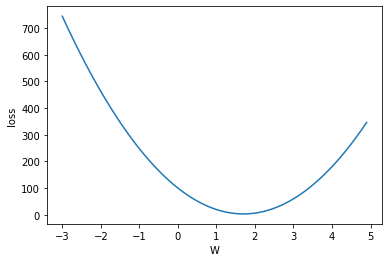

In [8]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution() #텐서플로우 v2 에서도 실행 가능하게 하기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

x_data = [2, 3, 3, 5, 7, 2, 8, 9, 6, 9, 6, 2]
y_data = [3, 5, 7, 10, 12, 7, 13, 13, 12, 13, 12 ,6]

W = tf.compat.v1.placeholder(tf.float32) 
b = tf.constant(0.0)
predictions = W * x_data + b # 선형 회귀 모델

loss = tf.reduce_mean(tf.square(y_data - predictions)) #평균 제곱 오차

sess = tf.compat.v1.Session() 
sess.run(tf.compat.v1.global_variables_initializer())

W_values = []
loss_values = []

for i in range(-30, 50): #-30 ~ 50 미포함
    W_value = i * 0.1 #-3.0 ~ 5.0 미포함 
    loss_value = sess.run(loss, feed_dict={W: W_value}) #W_value 입력 받기
    #print(W_value, loss_value)
    W_values.append(W_value)
    loss_values.append(loss_value)

df = pd.DataFrame({'W': W_values, 'loss': loss_values})
sns.lineplot(x='W', y='loss', data=df)
plt.show()

위 그래프를 보면, W가 약 1.6 - 1.8 일 때 손실이 가장 낮다.

In [33]:
from IPython.display import Image

# 3. CNN  
CNN은 실제에서 매우 좋은 결과를 달성하는 DNN이다. 이것은 특히 이미지의 대상 인식에서 좋은 성과를 낸다.  
  
    
3.1 특징 인식과 합성곱  
  
  실제 이미지는 높은 수를 가진 픽셀로 구성된 grid와 연관된다. 한 픽셀에 상응하는 그리드 각각의 원소는 어떤 값을 갖는지에 따라 다른 색을 표현한다. 그레이 영역은 각 그리드 요소의 값이 0-255 사이에 있는데, 이때 0은 검정, 255는 하양이다.  
    

  색을 가진 이미지는 3 개의 행렬의 그룹으로 표현되는데, 각각의 행렬은 하나의 칼라 채널 (rgb)에 상응한다. 그리고 각 행렬의 각 요소는 근본적인 색의 밝기를 명시하는 간격[0,255] 에 따라 다르다. 이것은 아래 그림같이 표현된다:

![대체 텍스트](https://www.filepicker.io/api/file/7auA4DAxRaGnxnBdHRj7)

## Reference  

[1] https://wikidocs.net/28099  
[2] Giancarlo Zaccone, et al, "Deep Learning with TensorFlow", Packt  
[3] https://www.tensorflow.org/tutorials/quickstart/advanced